Objectives -> Develop and build a machine learning model

Key phyton libraries:
    - numpy -> vectorised arrays, and maths, algebra functionality;
    - pandas -> data structures and data analysis tools;
    - matplotlib -> high customisable plotting functionality
    - scikit-learn -> models and tools for most machine learning algorithms

In [41]:
# these are import statements 
# by convention, the libraries are imported as a shorthand that we will refer to 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rather than importing the whole sklearn library, we will import certain modules 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Step 1: Define Problem Statement

In [42]:
# we load the dataset and save it as the variable boston
boston = load_boston()

# if we want to know what sort of detail is provided with this dataset, we can call .keys()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
# the info at the .DESCR key will tell us more 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step 2: Analyse and Preprocess data

In [44]:
# we can use pandas to create a dataframe, which is basically a way of storing and operating on tabular data 
# here we pass in both the data and the column names as variables
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)

In [45]:
# we will also drop one of the features - B 
boston_X = boston_X.drop(columns='B')

In [46]:
# we can then look at the top of the dataframe to see the sort of values it contains
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [47]:
# pandas has a lot of functionality to assist with exploratory data analysis
# .describe() provide summary statistics on all numeric columns
print(boston_X.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063  
std     28.148861    2.105710 

In [48]:
# we can also see the shape of the data
print(boston_X.shape)

(506, 12)


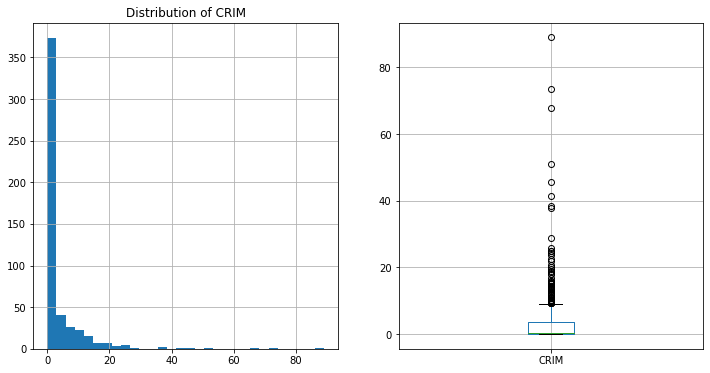

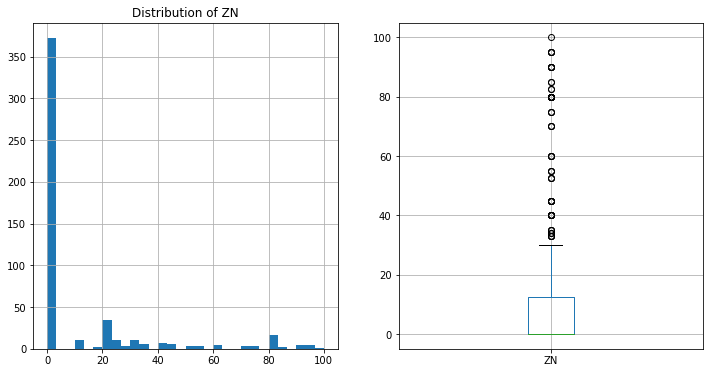

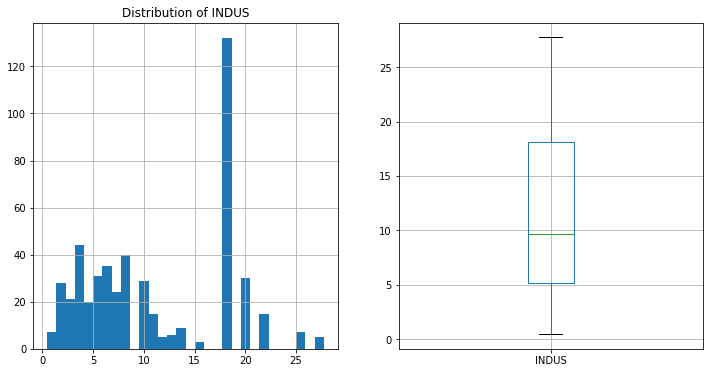

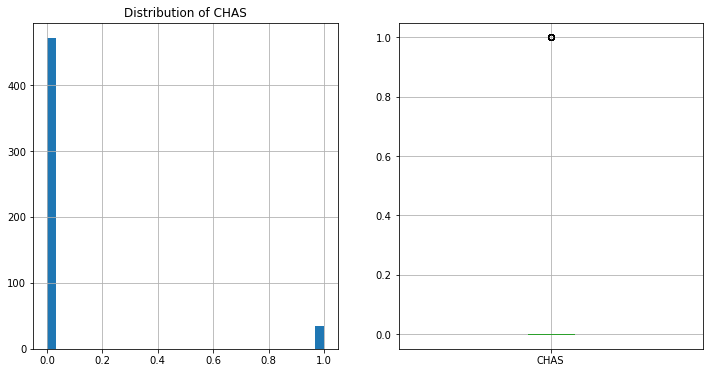

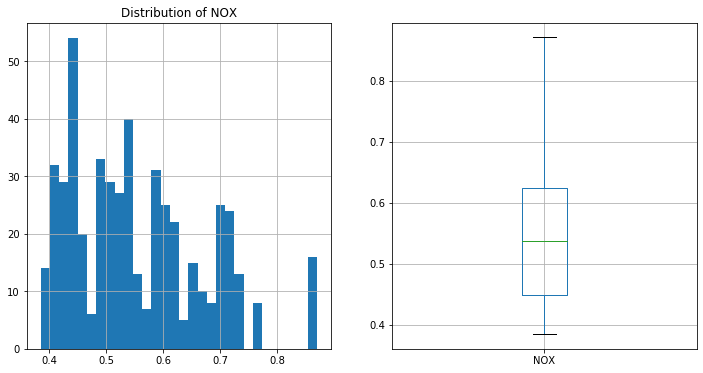

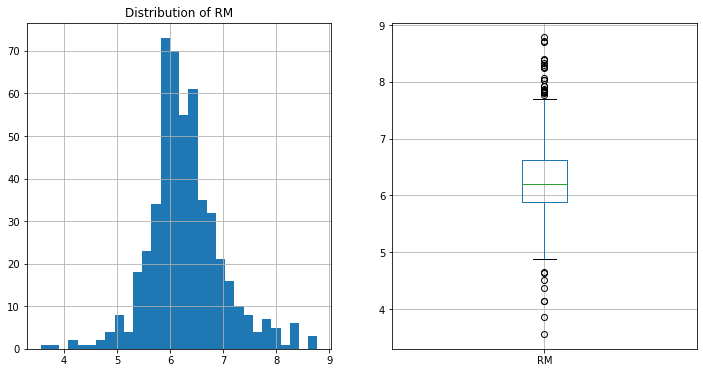

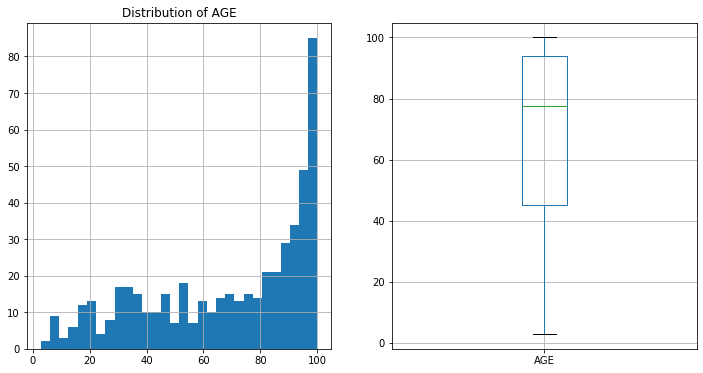

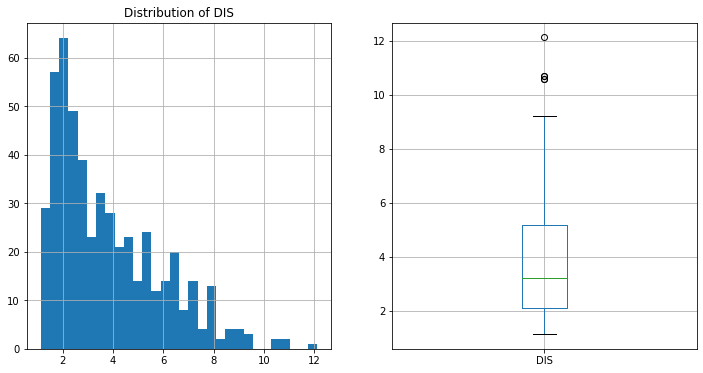

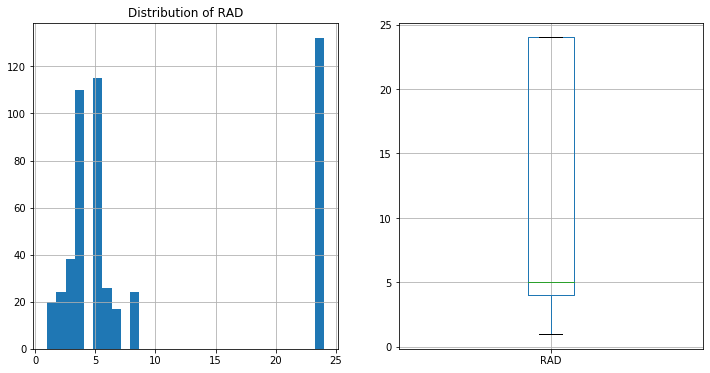

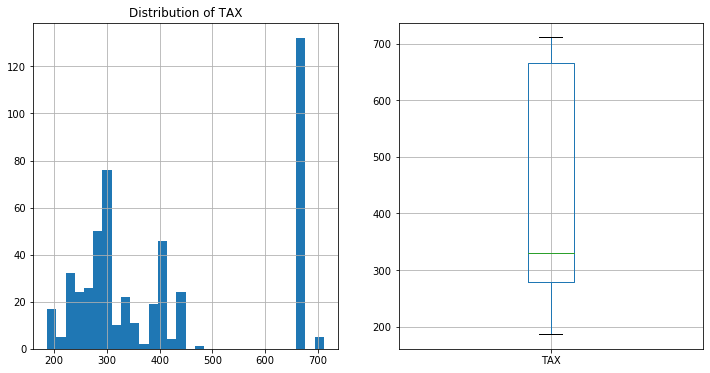

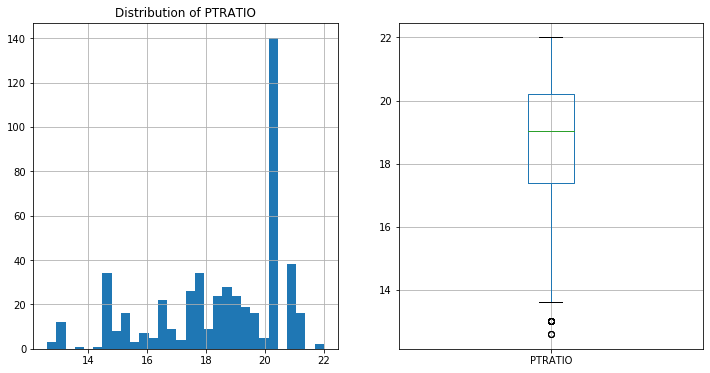

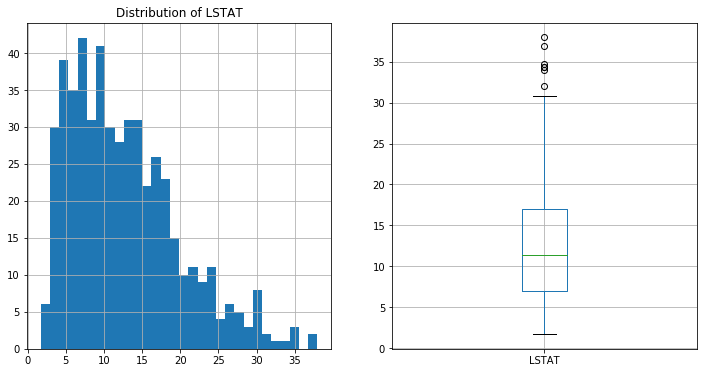

In [49]:
# we can build on this analysis by plotting the distribution and boxplots for each column

# we loop through all the columns
for col in boston_X.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    boston_X[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of ' + col)
    # our second column is the boxplot 
    boston_X.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

In [50]:
# we can now look at our target variable 
boston_y = boston.target

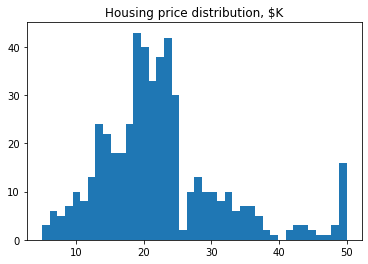

In [51]:
# we can plot a histogram in a slightly different way 
plt.hist(boston_y, bins = 40)
plt.title('Housing price distribution, $K')
plt.show()

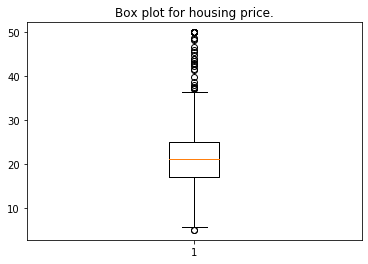

In [52]:
# and the same for the boxplot
plt.boxplot(boston_y)
plt.title('Box plot for housing price.')
plt.show()

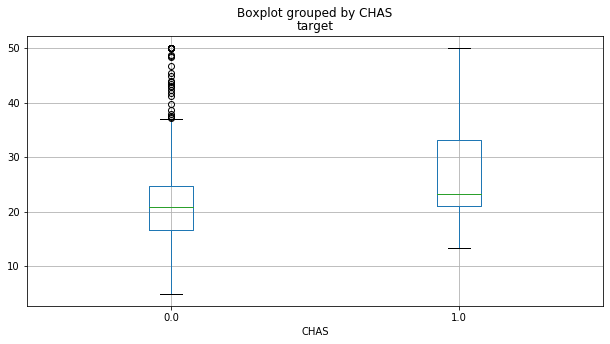

In [53]:
# another thing we can do is plot a boxplot of one variable against the target variable 
# it is interesting to see how house value distribution differs by CHAS, the categorical variable 

# here we create a grouped dataframe that includes the target variable
grouped_df = boston_X.copy()   # note we create a copy of the data here so that any changes don't impact the original data
grouped_df['target'] = boston_y.copy()

# we then plot it here
f, axes = plt.subplots(1, 1, figsize=(10, 5))   
grouped_df.boxplot(column='target', by = 'CHAS', ax = axes)
plt.show()

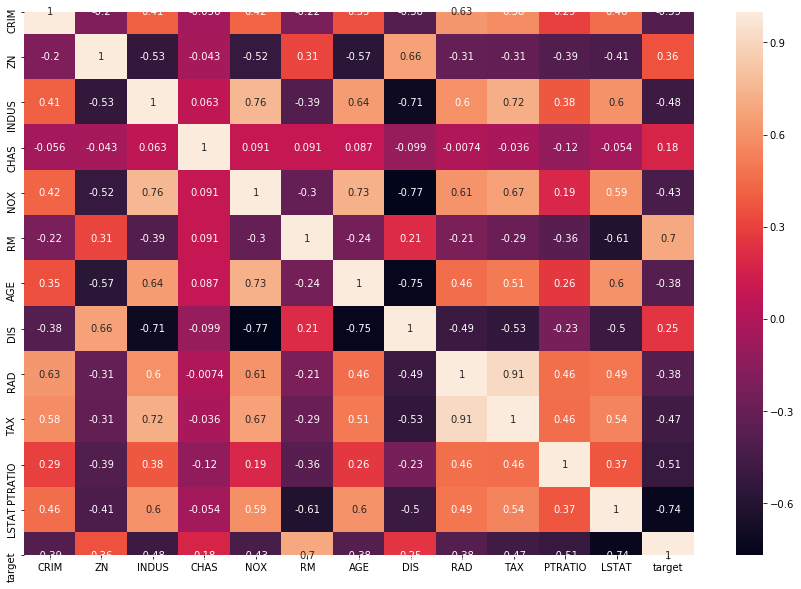

In [54]:
# we can extend this sort of analysis by creating a heatmap
# this shows the correlation between the features and target

# first we compute the correlation
corr = grouped_df.corr(method='pearson')
# and plot our figure size
plt.figure(figsize = (15, 10))
# and use seaborn to fill this figure with a heatmap
sns.heatmap(corr, annot = True)

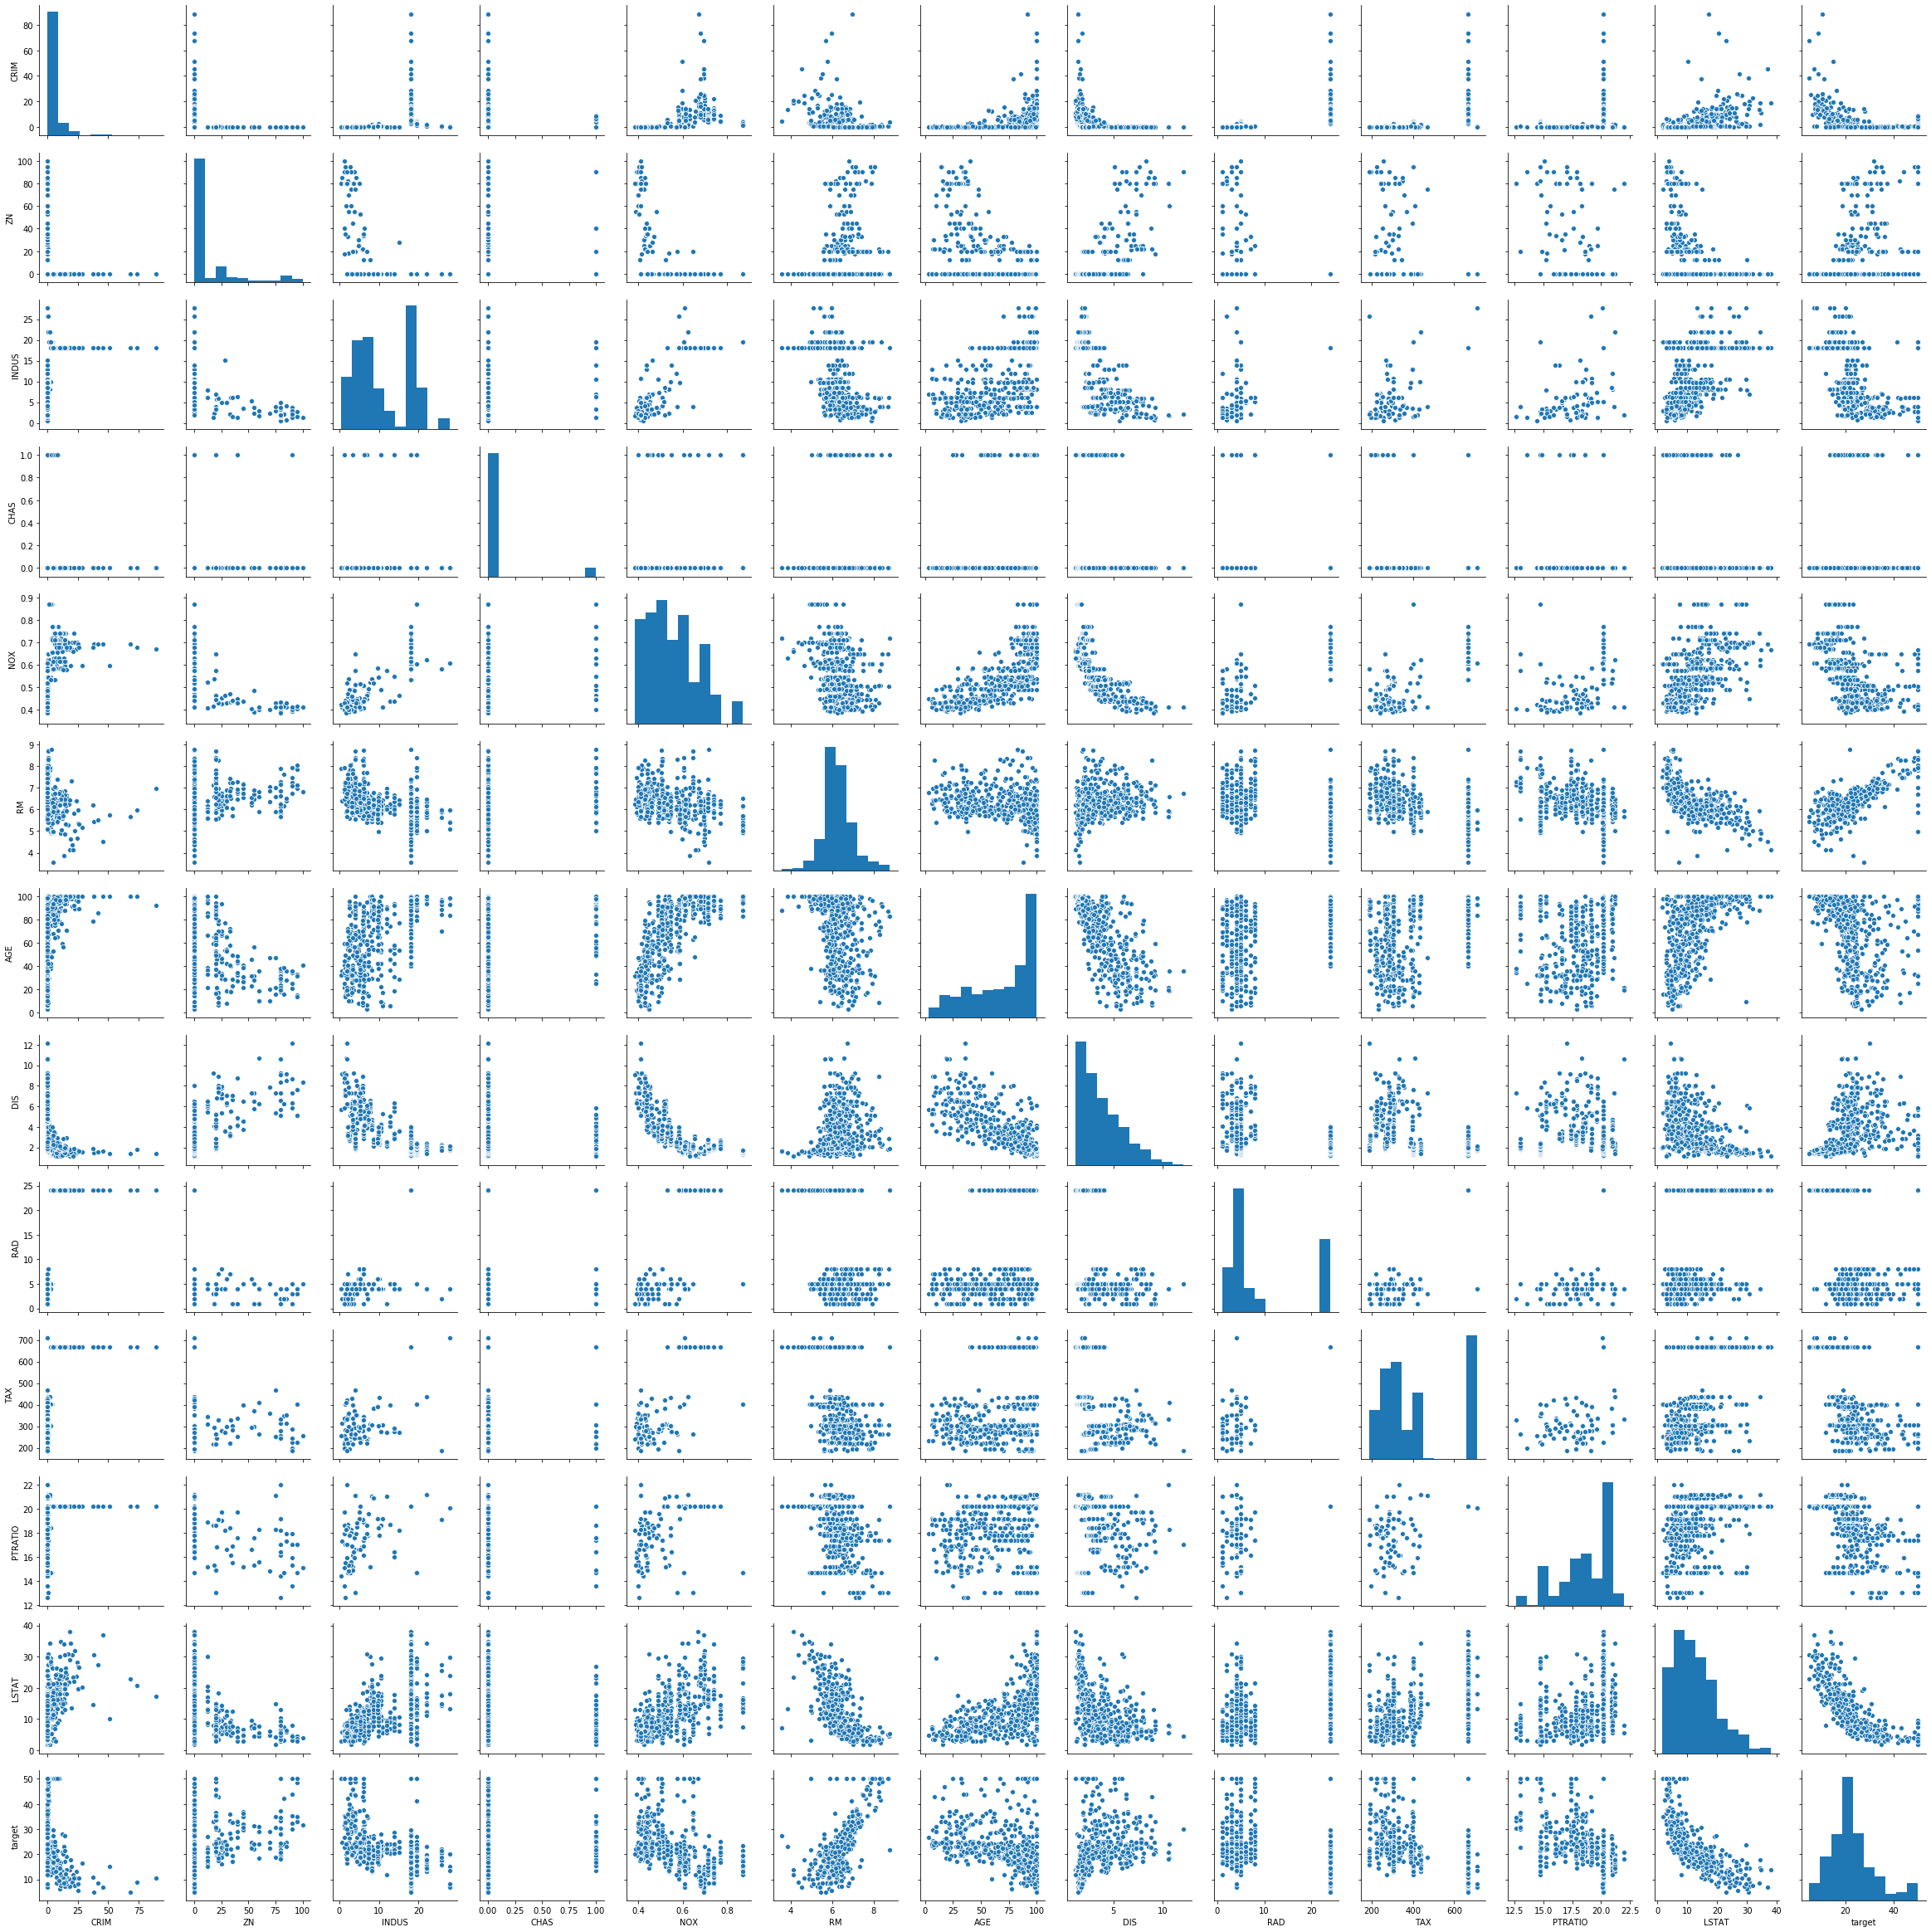

In [55]:
# OPTIONAL: below is code that generate a pairplot using seaborn 
# look up what a pairplot is and see if you can interpret the output of the code below

sns.pairplot(grouped_df)

In [56]:
# lets start by removing outliers

# here we define the columns where we have identified there could be outliers
numeric_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# this function can be used on any dataset to return a list of index values for the outliers 
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col] < mean - 3*sd)].index
        # and add those values to our list
        outlier_idxs += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [57]:
# we call the function we just created on the boston dataset
boston_outliers = get_outliers(boston_X, numeric_columns)

In [58]:
# and drop those values from our feature and target values
boston_X = boston_X.drop(boston_outliers, axis = 0)
boston_y = pd.DataFrame(boston_y).drop(boston_outliers, axis = 0).values.ravel()

In [59]:
# we can check that this code has worked by looking at the shape of our data 
print(boston_X.shape)
print(boston_y.shape)

(469, 12)
(469,)


In [60]:
# we can also create a function to normalize our data
# first lets look at the data before normalisation
boston_X[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10


In [61]:
# this function loops through columns in a data set and defines a predefined scaler to each
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data


In [62]:
# we can now define the scaler we want to use and apply it to our dataset 

# a good exercise would be to research waht StandardScaler does - it is from the scikit learn library 
scaler = StandardScaler()
boston_X = scale_numeric(boston_X, numeric_columns, scaler)


In [63]:
# here we can see the result 
boston_X[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.548994,0.482440,-1.331520,0.0,-0.158204,0.480898,-0.143244,0.195980,-0.977034,-0.652970,-1.499062,-1.145501
1,-0.544792,-0.469807,-0.625009,0.0,-0.760481,0.230239,0.355341,0.653616,-0.860169,-0.977329,-0.320854,-0.522533
2,-0.544796,-0.469807,-0.625009,0.0,-0.760481,1.473769,-0.292456,0.653616,-0.860169,-0.977329,-0.320854,-1.287766
3,-0.543779,-0.469807,-1.350815,0.0,-0.856496,1.169397,-0.849271,1.224996,-0.743303,-1.097462,0.103300,-1.450995
4,-0.536435,-0.469807,-1.350815,0.0,-0.856496,1.411918,-0.543569,1.224996,-0.743303,-1.097462,0.103300,-1.093088
5,-0.544283,-0.469807,-1.350815,0.0,-0.856496,0.244888,-0.379800,1.224996,-0.743303,-1.097462,0.103300,-1.111058
6,-0.532583,0.191476,-0.506268,0.0,-0.280406,-0.435473,-0.092294,0.963229,-0.509573,-0.562870,-1.546191,-0.029848
7,-0.521320,0.191476,-0.506268,0.0,-0.280406,-0.175048,0.981302,1.166715,-0.509573,-0.562870,-1.546191,0.976486
8,-0.507968,0.191476,-0.506268,0.0,-0.280406,-1.055610,1.123236,1.235379,-0.509573,-0.562870,-1.546191,2.590813
9,-0.516217,0.191476,-0.506268,0.0,-0.280406,-0.448494,0.610093,1.501476,-0.509573,-0.562870,-1.546191,0.669494


### Step 3: Split Dataset to create train and test data

In [64]:
# a common way for splitting our dataset is using train_test_split 

# as an exercise, go to the scikit learn documentation to learn more about this function and the parameters available 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

In [65]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  375
Number of features:  12


Test Set:
Number of datapoints:  94
Number of features:  12


###  Step 4: Choose a Baseline algorithm

In [66]:
# we instantiate a model by storing it as a variable 
# this is the same process for most of the algorithms available in scikit learn (though you will need to import different libraries for different algorithms)

# linear regression is a fairly simple algorithm compared to more complicate regression options, so provides a good baseline
lm = LinearRegression()

### Step 5: Train and Test the Model

In [67]:
# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# from this, we can generate a set of predictions on our unseen features, X_test
Y_pred = lm.predict(X_test)

### Step 6: Choose an evaluation metric

In [70]:
def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)
    
    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean squared error:  14.054498954365062
Mean absolute error:  2.7689457931357526
R^2 :  0.7772335179847554


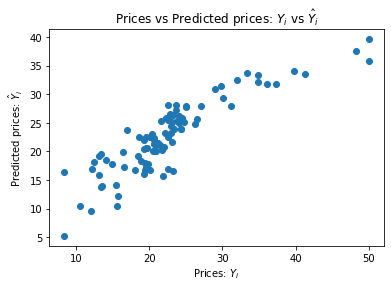

In [71]:
evaluate(Y_test, Y_pred)

In [72]:
# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(Y_test - Y_pred)

array([1.41315575e+01, 2.89814207e+00, 5.51587343e+00, 8.30440252e-01,
       3.24814672e-01, 7.48417502e-01, 7.93048129e+00, 6.24943461e+00,
       3.70911373e+00, 3.40301311e+00, 1.09067045e+00, 8.45446293e-01,
       2.02032429e+00, 5.65283519e+00, 3.93859425e+00, 4.45945796e+00,
       1.48895175e+00, 1.74224903e+00, 7.75178395e-01, 1.22084735e+00,
       7.88804330e-01, 3.59669325e+00, 4.95846329e-01, 2.46884717e+00,
       2.94070872e+00, 1.40441273e-01, 7.02552144e-01, 7.75182825e+00,
       1.01342502e+00, 6.68812027e+00, 3.41746380e+00, 2.68045044e+00,
       2.08196922e+00, 4.32100803e+00, 2.48849607e+00, 5.08218663e+00,
       2.38621708e+00, 1.21278928e+00, 2.02511212e+00, 4.12143291e-01,
       2.96455082e-01, 4.14456642e-01, 2.10383739e-04, 1.34898797e+00,
       3.51372181e+00, 3.01208347e+00, 4.53303812e-01, 4.60385111e-01,
       7.43447384e-01, 6.13819474e+00, 2.07869960e+00, 4.86379726e+00,
       3.22627051e+00, 1.02284513e+01, 1.43955576e+00, 3.17514607e+00,
      

In [73]:
# we will then sum them up 
np.sum(np.abs(Y_test - Y_pred))

260.28090455476075

In [74]:
# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
np.sum(np.abs(Y_test - Y_pred))/len(Y_test)

2.7689457931357526

### Step 7: Refine our dataset

In [76]:
# here we are using pandas functionality to add a new column called LSTAT_2, which will feature values that are the square of LSTAT values
boston_X['LSTAT_2'] = boston_X['LSTAT'].map(lambda x: x**2)

In [77]:
# we can run our train_test_split function and see that we have an additional features
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

print('Number of features after Step 7: ', X_train.shape[1])

Number of features after Step 7:  13


Mean squared error:  14.192521798416406
Mean absolute error:  2.9043998296716462
R^2 :  0.775045829650444


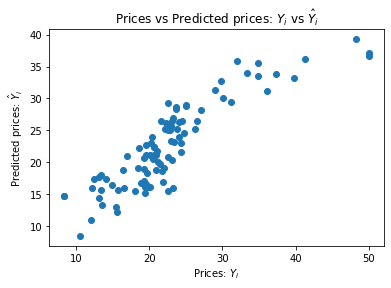

In [78]:
# we can now run the same code as before on our refined dataset to see if things have improved 
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

evaluate(Y_test, Y_pred)

### Step 8: Test Alternative Models

In [79]:
# as you can see, its very similar code to instantiate the model
# we are able to pass in additional parameters as the model is created, so optionally you can view the documentation and play with these values

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean squared error:  8.40115425531915
Mean absolute error:  2.0549999999999997
R^2 :  0.8668401069008869


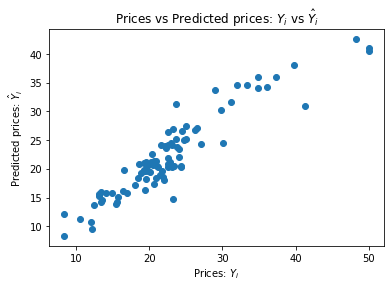

In [80]:
evaluate(Y_test, Y_pred)

### Step 9: Choose the best model and optimise its parameters

In [81]:
## grid search is a 'brute force' search, one that will explore every possible combination of parameters that you provide it

# we first define the parameters we want to search as a dictionary. Explore the documentation to what other options are avaiable
params = {'n_estimators': [100, 200], 'max_depth' : [2, 10, 20]}

# we then create a grid search object with our chosen model and paramters. We also use cross validation here - explored more in Day 2
grid = model_selection.GridSearchCV(rfr, params, cv=5)

In [82]:
# we fit our model to the data as before
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 10, 20], 'n_estima

In [83]:
# one output of the grid search function is that we can get the best_estimator - the model and parameters that scored best on the training data - 
#  and save it as a new a model
best_model = grid.best_estimator_

Mean squared error:  7.484974715223847
Mean absolute error:  1.8320599450121455
R^2 :  0.881361726896311


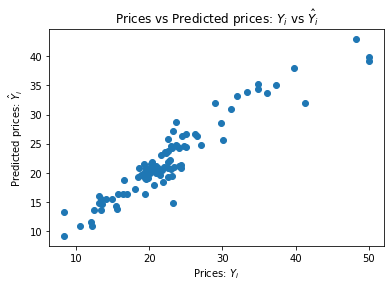

In [84]:
# and use it to predict and evaluate as before
Y_pred = best_model.predict(X_test)

evaluate(Y_test, Y_pred)